In [1]:
#do not have to run this cell for grading, this notebook was run on google colab, thats why this is here.

from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My Drive/Colab Notebooks/ITS Labs/Lab 04/

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Colab Notebooks/ITS Labs/Lab 04


In [0]:
import matplotlib, cv2
import numpy as np
import scipy.ndimage as nd
import matplotlib.pyplot as plt
import torch

%matplotlib inline

In [0]:
#reading the image from disk

image = cv2.imread('car.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

(-0.5, 799.5, 799.5, -0.5)

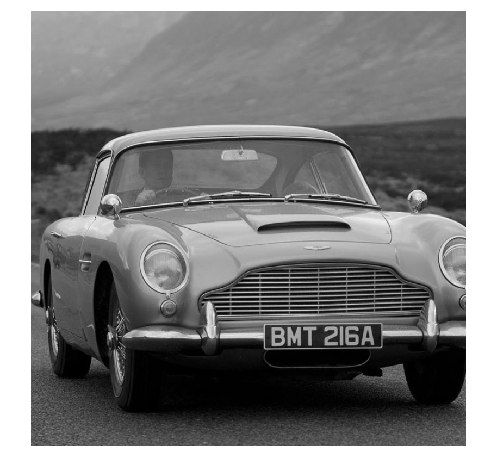

In [4]:
#plotting the image

plt.figure(figsize=(8, 8))
plt.imshow(gray_image, 'gray')
plt.axis("off")

In [0]:
#pading the image with 0s around

padded_image = np.pad(gray_image, ((1,1),(1,1)), 'constant')

In [0]:
#getting the padded image size to a new variable

ps = padded_image.shape

In [0]:
def filter(kernel):
  
  #broadcast a new tensor as same sized as the original image, zeros will be replaced with calculated pixel values later on
  filtered = torch.zeros(ps)
  
  total = 0
  matrix = kernel
  w, h = gray_image.shape
  
  
  for i in range(w):
    
    for j in range(h):
      
      #getting all the pixels around the designated pixel
      bottom = int(padded_image[j][i+1])
      bottomLeft = int(padded_image[j-1][i+1])
      bottomRight =  int(padded_image[j+1][i+1])
      center = int(padded_image[j][i])
      left = int(padded_image[j-1][i])
      right =  int(padded_image[j+1][i])
      top =  int(padded_image[j][i-1])
      topRight =  int(padded_image[j+1][i-1])
      topLeft =  int(padded_image[j-1][i-1])
      
      #sum of all pixel values around
      total = topLeft * matrix[0] + top * matrix[1] + topRight * matrix[2] + left * matrix[3] + center * matrix[4] + right * matrix[5] + bottomLeft * matrix[6] + bottom * matrix[7] + bottomRight * matrix[8]
            
        
      #saving the pixel value in the tensor which created abouve with zeros
      filtered[j][i] = int(total)
      

      
  return filtered

In [0]:
#flatten kernel matrices, i have flatten all the filter kernels into 1d array/list


#linear kernel matrix
linear_kernel = [0, 0, 0, 0, 0, 1, 0, 0, 0]


#sharpening kernel matrix, used a loop to calculate the sharpen kernel
sharp = [0, 0, 0, 0, 2, 0, 0, 0, 0]
box_kernel = [1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9]

sharp_kernel = []

for x in range(0, 9):
  sharp_kernel.append(sharp[x] - box_kernel[x])


#sobel kernel matrix
sobel_kernel = [1, 0, -1, 2, 0, -2, 1, 0, -1]


#gaussian kernel matrix
gaussian_kernel = [1/16, 2/16, 1/16, 2/16, 4/16, 2/16, 1/16, 2/16, 1/16]

In [0]:
#calling the filter function to generate filtered images and save them seperate as their names

linear_filter = filter(linear_kernel)

sharp_filter = filter(sharp_kernel)

sobel_filter = filter(sobel_kernel)

gaussian_filter = filter(gaussian_kernel)

(-0.5, 801.5, 801.5, -0.5)

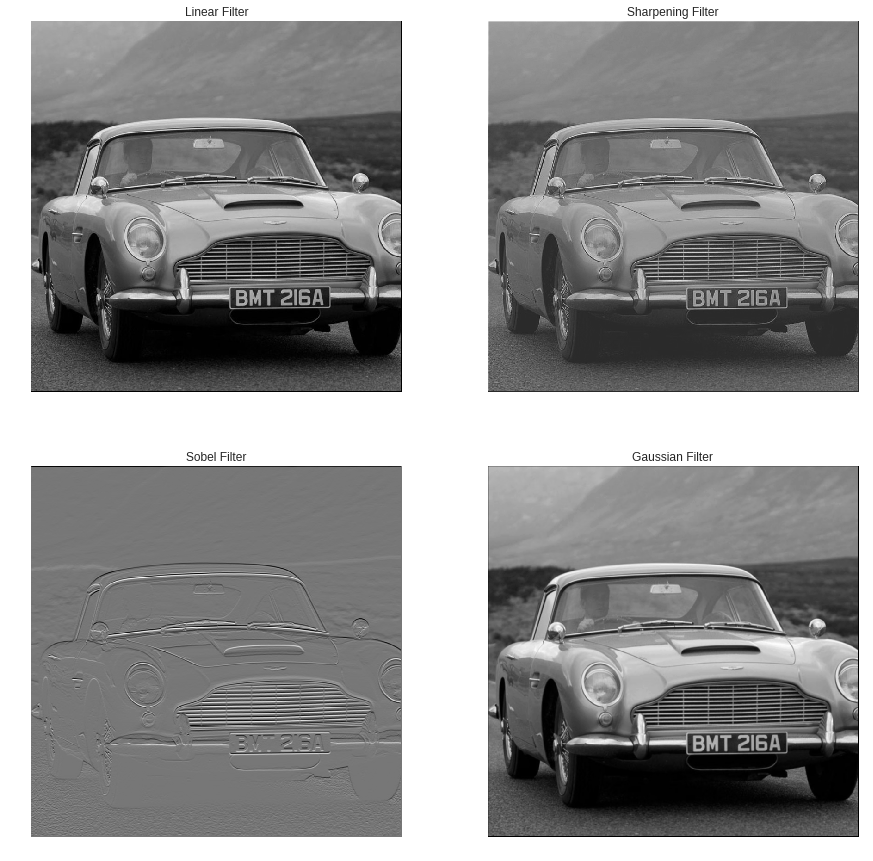

In [10]:
#plotting all the filtered images

plt.figure(figsize=(15, 15), facecolor='white')

plt.subplot(2, 2, 1)
plt.imshow(linear_filter, 'gray')
plt.title('Linear Filter')
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(sharp_filter, 'gray')
plt.title('Sharpening Filter')
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(sobel_filter, 'gray')
plt.title('Sobel Filter')
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(gaussian_filter, 'gray')
plt.title('Gaussian Filter')
plt.axis("off")

In [0]:
#reading image from disk

image2 = cv2.imread('chess.png')

#gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
gray_image2 = image2

In [0]:
#using inbuilt sobel filters to calculate Ix and Iy

Ix = nd.sobel(gray_image2, 1)

Iy = nd.sobel(gray_image2, 0)

In [0]:
#computing Ixx, Iyy and IxIy

Ixx = Ix**2

Iyy = Iy**2

IxIy = Iyy * Ixx

In [0]:
#getting width and height

height = gray_image2.shape[0]

width = gray_image2.shape[1]

In [0]:
#calculating the sum

k = 0.004
window_size = 6
offset = int(window_size/2)
harris_response =[]


#loop and find out corners

for y in range(offset, height-offset):
   
    for x in range(offset, width-offset):
      
        #sums

        Sxx = np.sum(Ixx[y - offset:y + 1 + offset, x - offset:x + 1 + offset])
        Syy = np.sum(Iyy[y - offset:y + 1 + offset, x - offset:x + 1 + offset])
        Sxy = np.sum(IxIy[y - offset:y + 1 + offset, x - offset:x + 1 + offset])
        
        
        #determinant and trace, use to get corner response
        determinant = (Sxx * Syy) - (Sxy**2)
        trace = Sxx + Syy
        
        #calculating R
        r = determinant - k * (trace**2)
        
        #harris corner detection
        harris_response.append([x, y, r])

In [0]:
#storing corner in the harris corner 

harris_image = np.array(gray_image2)

In [0]:
for response in harris_response:
  
    #if corner response is over threshold, color the point and add to corner list

    x, y, r = response
    
    if r > 0:
      
      #i used this for gray images
      
        #print(r)
        #harris_image[y,x] = 0
        #harris_image[y,x] = 255
        #harris_image[y,x] = 0
        
      #for color images  
        
        harris_image[y,x,2] = 255
        harris_image[y,x,0] = 0
        harris_image[y,x,1] = 0

(-0.5, 254.5, 197.5, -0.5)

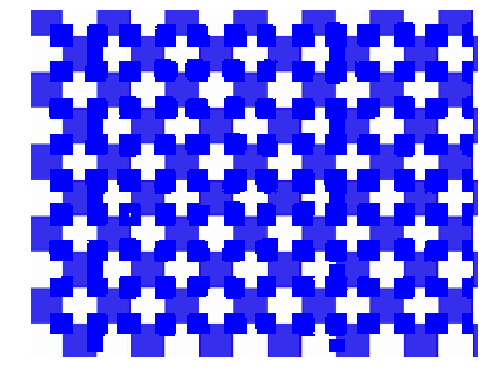

In [18]:
#plotting harris corner image

plt.figure(figsize=(8, 8))
plt.imshow(harris_image)
plt.axis("off")